In [113]:
#importing all the required libraries and dependancies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import warnings
import pickle


In [114]:
warnings.filterwarnings('ignore')

In [115]:
df = pd.read_csv('preprocessed_data.csv')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181622 entries, 0 to 181621
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     181622 non-null  int64  
 1   item_date      181622 non-null  object 
 2   quantity tons  181622 non-null  float64
 3   customer       181622 non-null  float64
 4   country        181622 non-null  float64
 5   status         181622 non-null  int64  
 6   item type      181622 non-null  float64
 7   application    181622 non-null  float64
 8   thickness      181622 non-null  float64
 9   width          181622 non-null  float64
 10  product_ref    181622 non-null  int64  
 11  delivery date  181622 non-null  object 
 12  selling_price  181622 non-null  float64
dtypes: float64(8), int64(3), object(2)
memory usage: 18.0+ MB


In [117]:
#encoding the categorical values

ordinal = OrdinalEncoder()

df['status'] = ordinal.fit_transform(df[['status']])
df['item type'] = ordinal.fit_transform(df[['item type']])

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181622 entries, 0 to 181621
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     181622 non-null  int64  
 1   item_date      181622 non-null  object 
 2   quantity tons  181622 non-null  float64
 3   customer       181622 non-null  float64
 4   country        181622 non-null  float64
 5   status         181622 non-null  float64
 6   item type      181622 non-null  float64
 7   application    181622 non-null  float64
 8   thickness      181622 non-null  float64
 9   width          181622 non-null  float64
 10  product_ref    181622 non-null  int64  
 11  delivery date  181622 non-null  object 
 12  selling_price  181622 non-null  float64
dtypes: float64(9), int64(2), object(2)
memory usage: 18.0+ MB


In [119]:
columns = ['quantity tons','thickness','width','selling_price']

In [120]:
def plot(df,column):
    plt.figure(figsize=(15,3))

    plt.subplot(1,3,1)
    sns.boxplot(data=df,x=column)
    plt.title(f'box plot of {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df,x=column,kde=True,bins=50)
    plt.title(f'hist plot of {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df,x=column)
    plt.title(f'violin plot of {column}')

    plt.show()

In [121]:
#we know 3 columns have skewness

reg_df = df.copy()

reg_df['quantity tons'] = np.log(reg_df['quantity tons']+1)   #adding 1 to avoid log(0)
reg_df['thickness'] = np.log(reg_df['thickness']+1)
reg_df['selling_price'] = np.log(reg_df['selling_price']+1)

In [122]:
#for selling price column instread of clipping the outlier values here we remove the entire rows
# selling price is the target column if we clip the the outlier values it may predict the clipped value for real life outlier value. that is not a good prediction

def outlier_deletion(df,column):
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_bound = df[column].quantile(0.75) + (1.5*IQR)
    lower_bound = df[column].quantile(0.25) - (1.5*IQR)

    df = df[(df[column]>= lower_bound) & (df[column]<= upper_bound)]
    return df

In [123]:
#dropping the unnecessary columns

reg_df.drop(['item_date','delivery date'],axis = 1,inplace=True)
reg_df.shape

(181622, 11)

In [124]:

for column in columns:
    reg_df = outlier_deletion(reg_df,column)

reg_df.shape

(163416, 11)

In [125]:
reg_df.isna().sum()

Unnamed: 0       0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

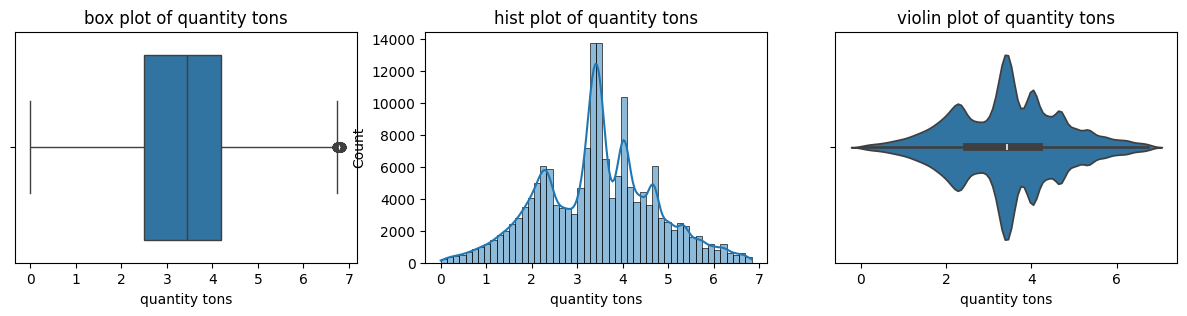

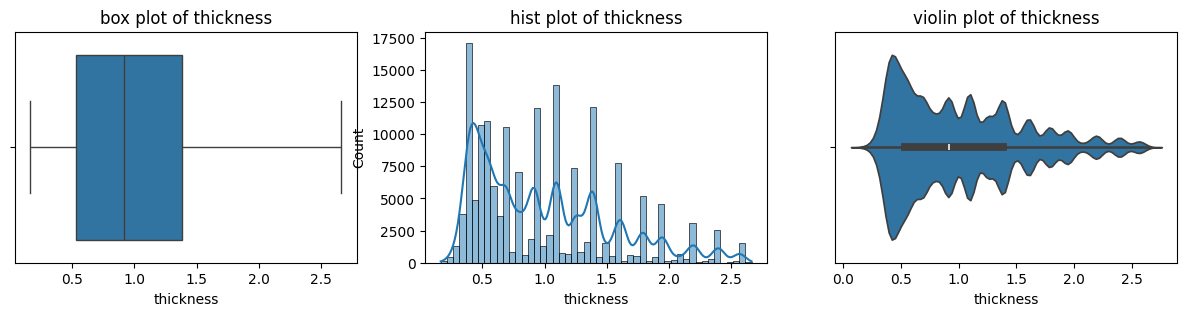

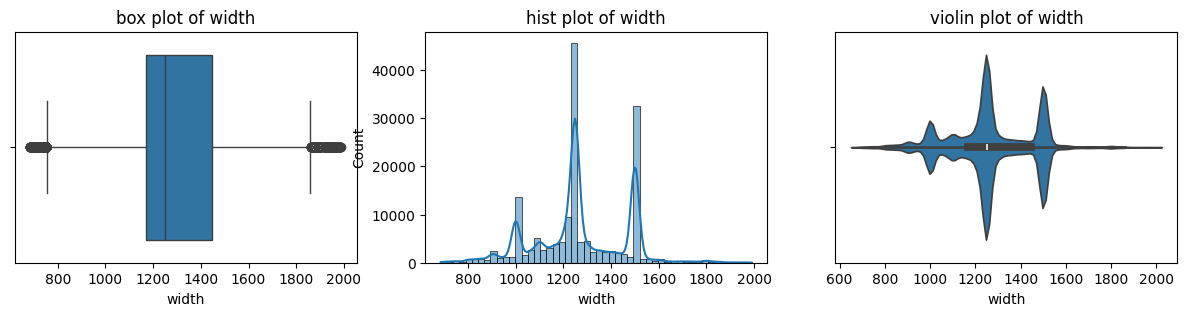

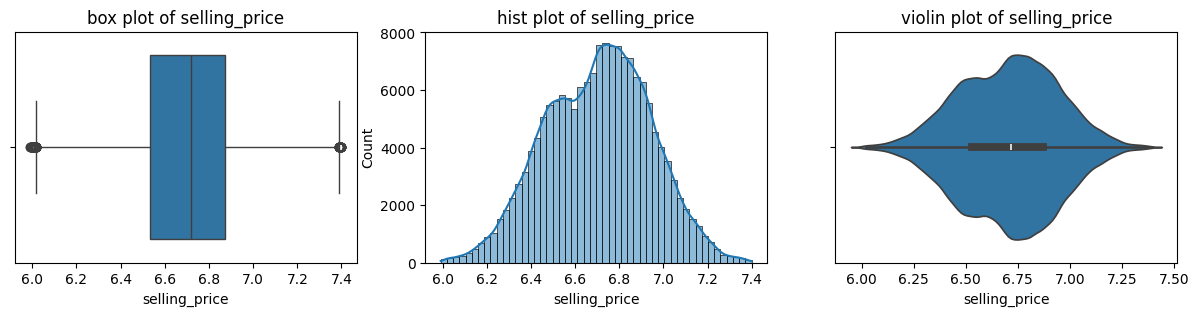

In [126]:
for column in columns:
    plot(reg_df,column)

In [127]:
final_csv = reg_df.to_csv('final_reg.csv',index=False)

In [128]:
reg_df.info()

,Unnamed: 0,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
181621,181672,6.010499,30200854.0,25.0,1.0,5.0,41.0,0.536493,1240.0,164141591,6.410175


In [129]:
X_reg = reg_df.drop(['selling_price'],axis =1).values
y_reg = reg_df['selling_price'].values

Xr_train,Xr_test,yr_train,yr_test = train_test_split(X_reg,
                                                     y_reg,
                                                     test_size= 0.15,
                                                     random_state= 3)

In [130]:
X_reg

array([[0.00000000e+00, 4.01007739e+00, 3.01563080e+07, ...,
        1.09861229e+00, 1.50000000e+03, 1.67079878e+09],
       [1.00000000e+00, 6.64512327e+00, 3.02029380e+07, ...,
        5.87786665e-01, 1.21000000e+03, 1.66870172e+09],
       [2.00000000e+00, 5.95875526e+00, 3.01539630e+07, ...,
        3.22083499e-01, 9.52000000e+02, 6.28377000e+05],
       ...,
       [1.81669000e+05, 5.34274789e+00, 3.02008540e+07, ...,
        6.67829373e-01, 1.50000000e+03, 1.64141591e+08],
       [1.81670000e+05, 1.65548022e+00, 3.02008540e+07, ...,
        5.36493371e-01, 1.25000000e+03, 1.64141591e+08],
       [1.81672000e+05, 6.01049859e+00, 3.02008540e+07, ...,
        5.36493371e-01, 1.24000000e+03, 1.64141591e+08]])

In [131]:
def right_reg_model(model,xtrain,xtest,ytrain,ytest):

    # fitting the model on training data
    algo = model().fit(xtrain,ytrain)

    #predict the train & test data

    train_pred = algo.predict(xtrain)
    test_pred = algo.predict(xtest)

    #evaluate the model
    train_mse = mean_squared_error(ytrain,train_pred)
    train_r2 = r2_score(ytrain,train_pred)

    test_mse = mean_squared_error(ytest,test_pred)
    test_r2 = r2_score(ytest,test_pred)

    print(f"model: {model.__name__},train mse: {train_mse},train r2: {train_r2}, test mse: {test_mse}, test r2: {test_r2}")

In [132]:
linear_model = LinearRegression
decision_tree_reg = DecisionTreeRegressor
random_forest_reg = RandomForestRegressor

reg_models = [ linear_model,decision_tree_reg,random_forest_reg]

for model in reg_models:
    right_reg_model(model,Xr_train,Xr_test,yr_train,yr_test)

model: LinearRegression,train mse: 0.021254679427605797,train r2: 0.6196118568240405, test mse: 0.02217840313602185, test r2: 0.6076684082371986
model: DecisionTreeRegressor,train mse: 8.518832263029004e-34,train r2: 1.0, test mse: 0.0040020562723796305, test r2: 0.9292044112447024
model: RandomForestRegressor,train mse: 0.00031055578451701186,train r2: 0.9944420832773629, test mse: 0.0022438377115237217, test r2: 0.9603069519649191


In [133]:
#random forest model give us the better r2 score

final_model = random_forest_reg().fit(Xr_train,yr_train)


In [134]:
#saving the final model

file_path = 'reg_random_forest.pkl'

with open(file_path,'wb') as f:
    pickle.dump(final_model,f)

In [135]:
#loading the final model

with open(file_path,'rb') as f:
    loaded_model = pickle.load(f)

In [136]:
Xr_test[100],yr_test[100]

(array([1.67920000e+04, 2.03432863e+00, 3.02717980e+07, 2.80000000e+01,
        1.00000000e+00, 5.00000000e+00, 1.00000000e+01, 1.38629436e+00,
        1.25000000e+03, 1.67079878e+09]),
 6.7226297948554485)

In [137]:
prediction = loaded_model.predict([Xr_test[100]])
prediction[0]

6.72651342063672